# ISCX2016 Dataset - Replication of Paper Results and Classifier Testing

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Dataset
https://www.unb.ca/cic/datasets/url-2016.html

In [2]:
# Dataset path
dataset_base_path = r"D:\\dev\\CyberML\\Datasets\\ISCXURL2016"

# mapping_label = {0:"benign", 1:"spam", 2:"phishing", 3:"malware"}
mapping_label = {0: 'benign', 1: 'malware', 2: 'phishing', 3: 'spam'}
mapping_label_r = dict((v, k) for k, v in mapping_label.items())

print(mapping_label)
print(mapping_label_r)

{0: 'benign', 1: 'malware', 2: 'phishing', 3: 'spam'}
{'benign': 0, 'malware': 1, 'phishing': 2, 'spam': 3}


In [3]:
urldata = pd.read_csv(os.path.join(
    dataset_base_path, "All_BestFirst.csv"), low_memory=False)
urldata = urldata[urldata["class"] != 'Defacement']
urldata["class"] = urldata["class"].apply(lambda x: mapping_label_r[x])
display(urldata)

print(urldata.info())

,domain_token_count,executable,NumberofDotsinURL,Arguments_LongestWordLength,NumberRate_Domain,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
0,19,0,18,-1,0.041,0.656,-1.0,0.612,2
1,15,0,15,-1,0.083,0.000,-1.0,0.633,2
2,15,0,15,-1,0.083,0.000,-1.0,0.633,2
3,14,0,13,-1,0.038,-1.000,-1.0,0.659,2
4,13,0,13,-1,0.232,0.000,-1.0,0.705,2
...,...,...,...,...,...,...,...,...,...
36689,2,0,1,-1,0.000,-1.000,-1.0,0.714,2
36690,2,0,1,-1,0.000,-1.000,-1.0,0.699,0
36691,2,0,1,-1,0.000,-1.000,-1.0,0.699,0
36692,2,0,1,-1,0.000,-1.000,-1.0,0.699,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28764 entries, 0 to 36693
Data columns (total 9 columns):
domain_token_count             28764 non-null int64
executable                     28764 non-null int64
NumberofDotsinURL              28764 non-null int64
Arguments_LongestWordLength    28764 non-null int64
NumberRate_Domain              28764 non-null float64
NumberRate_FileName            28764 non-null float64
NumberRate_AfterPath           28764 non-null float64
Entropy_Domain                 28764 non-null float64
class                          28764 non-null int64
dtypes: float64(4), int64(5)
memory usage: 2.2 MB
None


Done


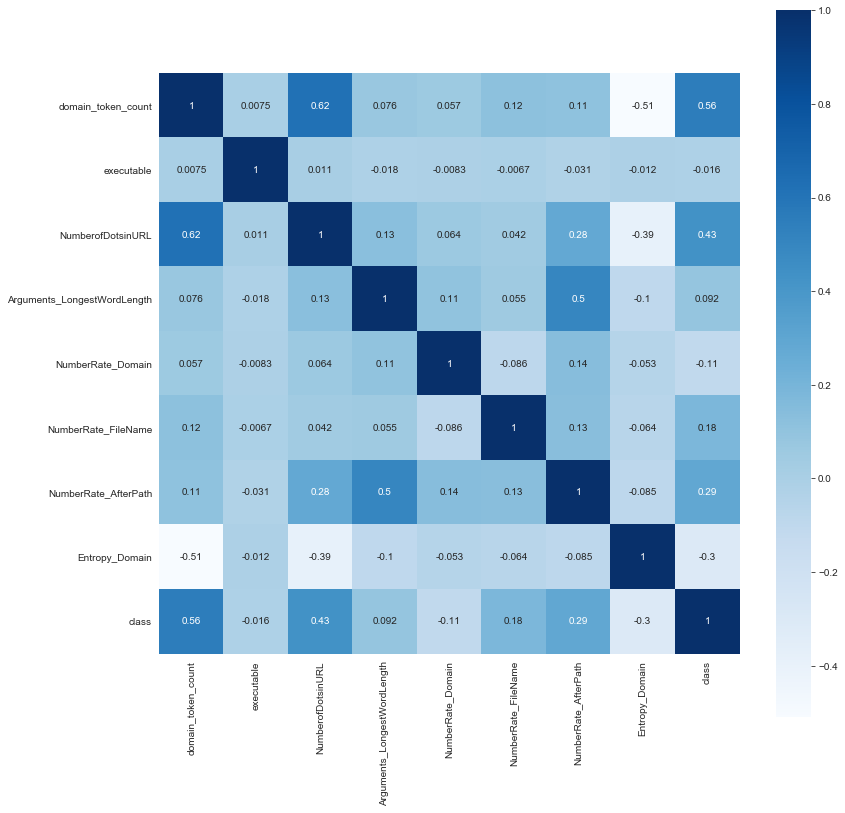

       domain_token_count    executable  NumberofDotsinURL  \
count        20134.000000  20134.000000       20134.000000   
mean             2.812357      0.001937           2.815933   
std              0.954669      0.043970           1.660439   
min              2.000000      0.000000           1.000000   
25%              2.000000      0.000000           2.000000   
50%              3.000000      0.000000           3.000000   
75%              3.000000      0.000000           3.000000   
max             19.000000      1.000000          20.000000   

       Arguments_LongestWordLength  NumberRate_Domain  NumberRate_FileName  \
count                 20134.000000       20134.000000         20134.000000   
mean                      0.969554           0.040007             0.117091   
std                       4.528789           0.101543             0.353320   
min                      -1.000000           0.000000            -1.000000   
25%                      -1.000000           0.0000

In [4]:
# Split data
X = urldata.drop("class", axis=1, inplace=False)
Y = urldata["class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)
print("Done")

# Heatmap
corrmat = urldata.corr()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corrmat, square=True, annot=True,
            annot_kws={'size': 10}, cmap='Blues')
plt.show()

# Random forest still gets high accuracy because features can be non linearly correlated

print(X_train.describe())

# Random Forest

In [5]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

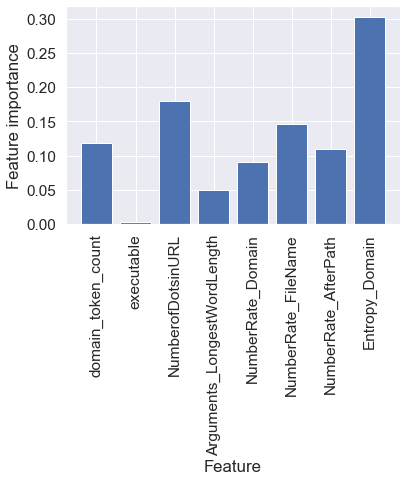

In [18]:
plt.figure(figsize=(6, 4))
plt.bar([x for x in range(len(rf.feature_importances_))],
        rf.feature_importances_)
plt.xticks([i for i in range(len(X.columns))], X.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.show()

Accuracy = 0.94
[[2202   33   66    1]
 [  25 1905   78   10]
 [ 112  100 2054   38]
 [   5    9   46 1946]]
Classification Report:
              precision    recall  f1-score   support

      benign       0.94      0.96      0.95      2302
     malware       0.93      0.94      0.94      2018
    phishing       0.92      0.89      0.90      2304
        spam       0.98      0.97      0.97      2006

    accuracy                           0.94      8630
   macro avg       0.94      0.94      0.94      8630
weighted avg       0.94      0.94      0.94      8630



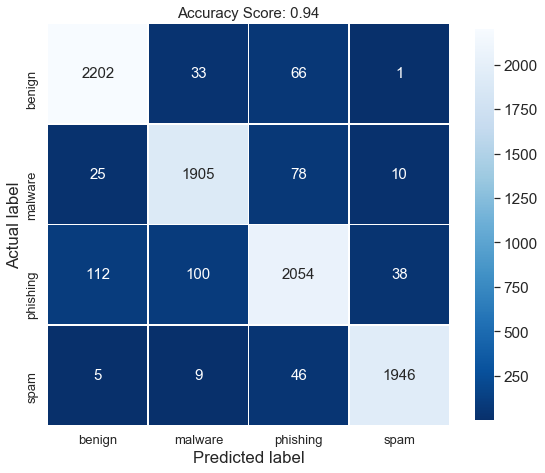

In [15]:
# Model Predictions
predicted = rf.predict(X_test)
acc = metrics.accuracy_score(y_test, predicted)
print("Accuracy = {:.2f}".format(acc))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)
print('Classification Report:')
print(metrics.classification_report(y_test, predicted, target_names=mapping_label.values()))

classes = [i for i in mapping_label.values()]
x_axis_labels = list(sorted(mapping_label.values()))
y_axis_labels = list(sorted(mapping_label.values()))
sns.set_style("darkgrid")
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.4)
# sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=classes, yticklabels=classes);
p = sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square=True, cmap='Blues_r',
                xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot_kws={
                    "size": 15},
                cbar=True, cbar_kws={"shrink": .80})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
p.set_xticklabels(x_axis_labels, size=13)
p.set_yticklabels(y_axis_labels, size=13)
all_sample_title = 'Accuracy Score: {:.2f}'.format(acc)
plt.title(all_sample_title, size=15)

plt.show()

# SVM Model

In [8]:
svm = SVC(gamma='auto', C=5)
svm.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy = 0.76
[[1732   73  482   15]
 [ 407 1150  377   84]
 [ 178   77 1959   90]
 [   3   75  218 1710]]
Classification Report:
              precision    recall  f1-score   support

      benign       0.75      0.75      0.75      2302
     malware       0.84      0.57      0.68      2018
    phishing       0.65      0.85      0.73      2304
        spam       0.90      0.85      0.88      2006

    accuracy                           0.76      8630
   macro avg       0.78      0.76      0.76      8630
weighted avg       0.78      0.76      0.76      8630



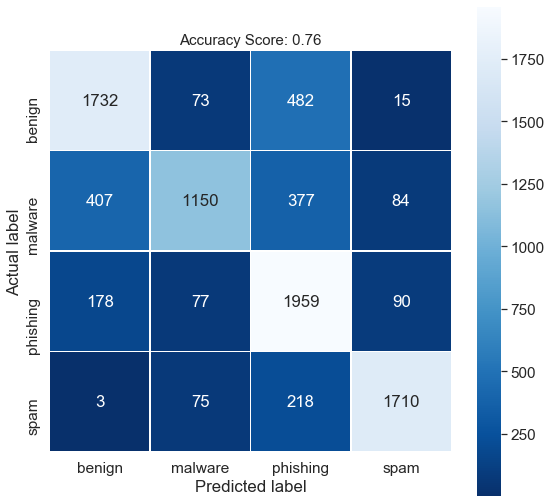

In [13]:
predicted = svm.predict(X_test)
acc = metrics.accuracy_score(y_test, predicted)
print("Accuracy = {:.2f}".format(acc))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)
print('Classification Report:')
print(metrics.classification_report(y_test, predicted, target_names=mapping_label.values()))

classes = [i for i in mapping_label.values()]
sns.set_style("darkgrid")
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square=True,
            cmap='Blues_r', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(acc)
plt.title(all_sample_title, size=15)
plt.show()

In [10]:
# # Stop execution early
# raise KeyboardInterrupt

In [11]:
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

n_comp = 2

# # PCA plot
# pca = PCA(n_components=n_comp).fit(X_train)
# print(pca.explained_variance_ratio_)
# data2D_PCA = pca.transform(X_train)

# t-SNE plot
embeddings = TSNE(
    n_components=n_comp,
    # init='pca',
    # perplexity=200,
    # perplexity=10,
    # perplexity=7,
    n_jobs=6, verbose=1
)
data2D_TSNE = embeddings.fit_transform(X_train)
print("Final Embeddings KL Divergence: {}".format(embeddings.kl_divergence_))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20134 samples in 0.241s...
[t-SNE] Computed neighbors for 20134 samples in 0.718s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20134
[t-SNE] Computed conditional probabilities for sample 2000 / 20134
[t-SNE] Computed conditional probabilities for sample 3000 / 20134
[t-SNE] Computed conditional probabilities for sample 4000 / 20134
[t-SNE] Computed conditional probabilities for sample 5000 / 20134
[t-SNE] Computed conditional probabilities for sample 6000 / 20134
[t-SNE] Computed conditional probabilities for sample 7000 / 20134
[t-SNE] Computed conditional probabilities for sample 8000 / 20134
[t-SNE] Computed conditional probabilities for sample 9000 / 20134
[t-SNE] Computed conditional probabilities for sample 10000 / 20134
[t-SNE] Computed conditional probabilities for sample 11000 / 20134
[t-SNE] Computed conditional probabilities for sample 12000 / 20134
[t-SNE] Computed conditional probabilities for sam

4 classes


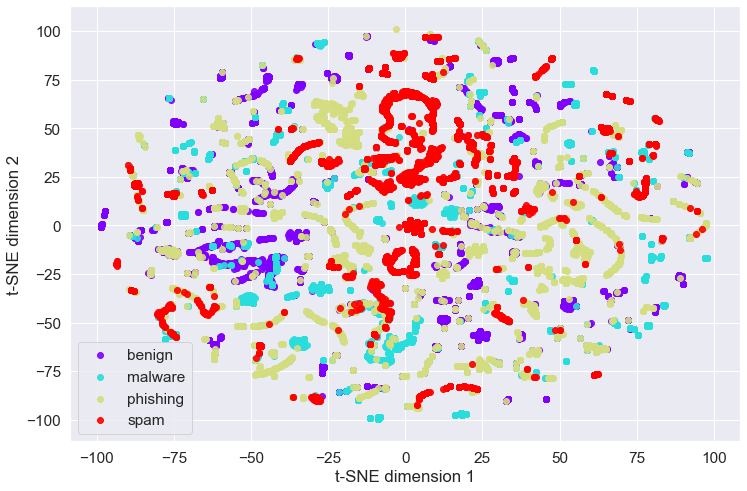

In [12]:
import matplotlib.cm as cm
# from mpl_toolkits.mplot3d import Axes3D

# data2D = data2D_PCA
data2D = data2D_TSNE

N = len(np.unique(y_train))
print(N, "classes")

# Combined plot
# https://stackoverflow.com/a/54944523/4017530
fig, ax = plt.subplots(figsize=(12, 8))
# fig = plt.figure(figsize = (12, 8))
# ax = plt.axes(projection='3d')
colors = cm.rainbow(np.linspace(0, 1, N))
for group, c in zip(np.unique(y_train), colors):
    ix = np.where(y_train == group)
    ax.scatter(data2D[ix, 0], data2D[ix, 1], color=c, label=mapping_label[group], alpha=0.9)

ax.legend()
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")

plt.show()